In [8]:
import pandas as pd
heart = pd.read_csv('heart.csv')
heart['Heart Disease'] = heart['Heart Disease'].apply(lambda x: 0 if x == 'Absence' else 1)

In [9]:
display(heart)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


# Texto

In [10]:
# variaveis (x) e classificacoes (y)

y = heart['Heart Disease']
X = heart.drop('Heart Disease', axis=1)

In [ ]:
#heart.drop("teste", axis=1, inplace=True)
#heart['Sex'] = heart['sex'].apply(lambda x: 0 if x == 'female' else 1).astype('int') #sex (sexo)
#heart['cp'] = heart['cp']. #cp (tipo de dor)
#heart['fbs'] = heart['fbs']. #fbs (glicemia em jejum)
#heart['restecg'] = heart['restecg']. #restecg (resultados eletrocardiográficos)
#heart['exang'] = heart['exang']. #exang (angina induzida)
#heart['ST depression'] = heart['oldpeak'].apply(lambda x : str(x).replace(",",".")).astype('float') #oldpeak (depressão do segmento)
#heart['Heart Disease'] = heart['disease'].apply(lambda x: 0 if x == 'Absence' else 1)
#heart['slope'] = heart['slope']. #slope (inclinação do segmento)

#heart['ca'] = heart['ca']. #ca (número de vasos)
#heart['thal'] = heart['thal']. #thal (tipos)
#heart['target'] = heart['target']. #target (diagnóstico de doença cardíaca)
# O último atributo que é o atributo target, foco da análise e do modelo preditivo.

In [13]:
# separacao de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

In [14]:
# treinamento modelo bayesiano
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [19]:
# vetor de predicao
y_pred = gnb.predict(X_test)
y_trai = gnb.predict(X_train)

# comparação de valores de teste (b_test) com valores preditos (b_pred)
from sklearn import metrics
print("Acurácia do modelo Naive Bayes Gaussiano(em %):", metrics.accuracy_score(y_test, y_pred)*100)
print("Acurácia do modelo Treinamento(em %):", metrics.accuracy_score(y_train, y_trai)*100)

Acurácia do modelo Naive Bayes Gaussiano(em %): 80.0
Acurácia do modelo Treinamento(em %): 87.22222222222223


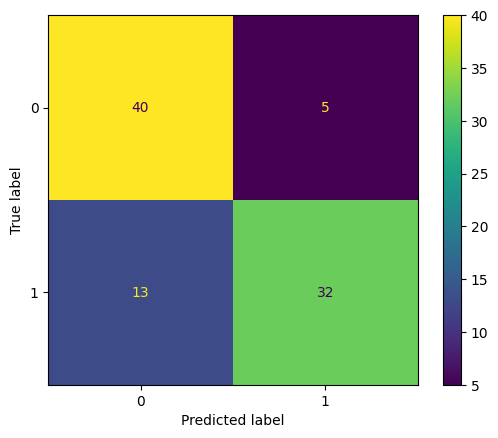

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz_confusao = confusion_matrix(y_test, y_pred)

matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao).plot()